## PCA

For the tabular dimensionality assignment I have choosen the dataset from sklearn https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import numpy as np

In [2]:
dataset = load_breast_cancer()
X, y = load_breast_cancer(return_X_y = True)
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [3]:
print("Features {}".format(X.shape))
print("Target {}".format(y.shape))

Features (569, 30)
Target (569,)


We can see that this dataset has 569 features. More the number of Features less would be the model efficiency because of curse of dimensionality problem. 

In [4]:
dataset.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
# This is a classification problem for the cancer dataset as the tumor could be malignant or benign
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

PCA is a linear unsupervised dimensionality reduction technique. Here there are two classification items that is tumor being malignant or benign. So in the below graph we can see 569 features reduced to two. But PCA assumes that the principle components are a linear combination of the original features. If this is not true, PCA will not give you sensible results.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'PC2')

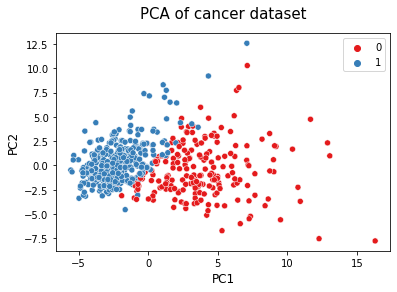

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y, palette='Set1')
plt.title("PCA of cancer dataset", fontsize=15, pad=15)
plt.xlabel("PC1", fontsize=12)
plt.ylabel("PC2", fontsize=12)

## SVD

Similar to PCA in SVD the dimensionality reduction techique does not work well for non-linear data. So the plot for SVD and PCA is almost similar for our dataset.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'SVD2')

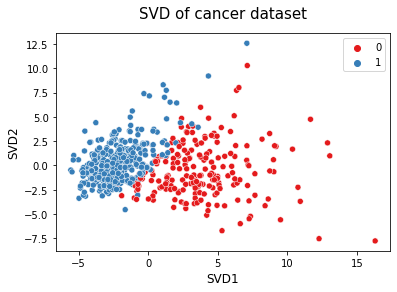

In [8]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2, algorithm='randomized',
                   random_state=0)
X_svd = svd.fit_transform(X_scaled)
sns.scatterplot(X_svd[:,0], X_svd[:,1], hue=y, palette='Set1')
plt.title("SVD of cancer dataset", fontsize=15, pad=15)
plt.xlabel("SVD1", fontsize=12)
plt.ylabel("SVD2", fontsize=12)

## LLE
LLE works well for linear features as shown in the below plot  but does not do a good job for curved patterns as that of PCA and SVD


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'SVD2')

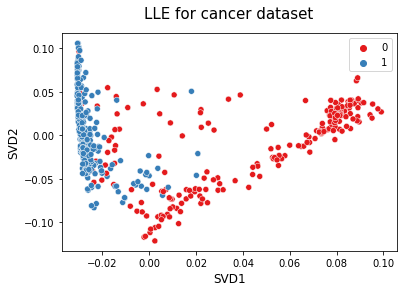

In [9]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(random_state=42)
X_lle = lle.fit_transform(X_scaled)
sns.scatterplot(X_lle[:,0], X_lle[:,1], hue=y, palette='Set1')
plt.title("LLE for cancer dataset", fontsize=15, pad=15)
plt.xlabel("SVD1", fontsize=12)
plt.ylabel("SVD2", fontsize=12)

### Elbow method to find the clusters

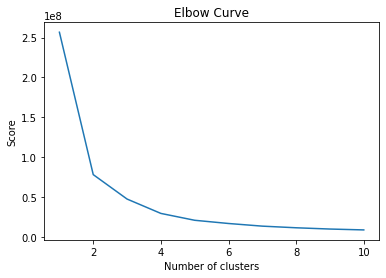

In [8]:
from sklearn.cluster import KMeans
SSE = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=1500,n_init=10,random_state=0)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
plt.plot(range(1,11),SSE)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()


We can see that the number of clusters for a stable score is 2 through the elbow method
## t-SNE
t-sne is suitable for small number of clusters. As our problem requires 2  clusters found through elbow method. t-sne dimentionality reduction technique is the appropriate approach

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 't-SNE of cancer dataset')

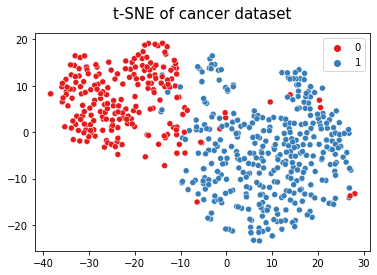

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=1)
X_tsne = tsne.fit_transform(X_scaled)

sns.scatterplot(X_tsne[:,0], X_tsne[:,1], hue=y, palette='Set1')
plt.title("t-SNE of cancer dataset", fontsize=15, pad=15)

## ISOMAP
For ISOMAP k (nearest neighbors) must be high. But for our approach through the elbow method we found that the K=3. For low K values this technique is not suited. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Isomap of cancer dataset')

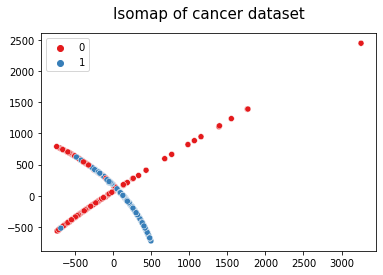

In [11]:
from sklearn.manifold import Isomap
isomap = Isomap(n_neighbors=3, n_components=2, 
                eigen_solver='auto')
X_isomap = isomap.fit_transform(X)

sns.scatterplot(X_isomap[:,0], X_isomap[:,1], hue=y, palette='Set1')
plt.title("Isomap of cancer dataset", fontsize=15, pad=15)

### UMAP
UMAP is similar to t-sne but works well for lower dimesions. But our dataset has around 569 features so this techique is not suitable for our dataset

In [13]:
!pip install umap-learn
import umap

     |████████████████████████████████| 86 kB 3.9 MB/s 
     |████████████████████████████████| 1.1 MB 16.5 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=c1c92f9d65a4640ccb1c881eda6a7805f243545bb5c6cf15d1c5a03d21277aeb
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=a60c973e93d70b00ff398cb0a4204456c60b7f9480333de56f398700b7d6b76a
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Umap of cancer dataset')

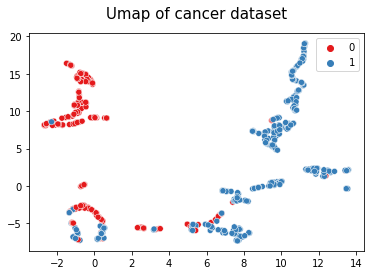

In [14]:
emb = umap.UMAP(n_neighbors=5)
X_umap = emb.fit_transform(X)

sns.scatterplot(X_umap[:,0], X_umap[:,1], hue=y, palette='Set1')
plt.title("Umap of cancer dataset", fontsize=15, pad=15)

For the breast cancer dataset t-sne dimensionality reduction technique works well. As it is useful for both linear and non-linear distribution patterns.